 # Алгоритми обходу графів та мінімальні остівні дерева

 ## Комплексний аналіз для навчального курсу



 ### Структура заняття:

 1. **Алгоритми обходу графів** (BFS, DFS, варіації)

 2. **Мінімальні остівні дерева** (Kruskal, Prim, Borůvka)

 3. **Практичні застосування** в різних доменах

 4. **Візуалізація та порівняння** продуктивності

In [1]:
# Імпорт бібліотек
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from collections import deque, defaultdict
import time
from typing import List, Tuple, Set, Dict, Optional
import seaborn as sns
import pandas as pd
from dataclasses import dataclass
import heapq
import warnings
warnings.filterwarnings('ignore')

# Налаштування візуалізації
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (14, 10)
plt.rcParams['font.size'] = 10


 # Частина 1: Алгоритми обходу графів



 ## Теоретичні основи



 **Обхід графу** - систематичне відвідування всіх вершин графу.



 ### Два фундаментальні підходи:



 1. **BFS (Breadth-First Search)** - пошук в ширину

    - Досліджує граф "шарами" від стартової вершини

    - Використовує чергу (FIFO)

    - Знаходить найкоротший шлях у незваженому графі



 2. **DFS (Depth-First Search)** - пошук в глибину

    - Йде максимально глибоко перш ніж відступити

    - Використовує стек (рекурсія або явний стек)

    - Корисний для топологічного сортування, пошуку циклів



 ### Складність обох: O(V + E)

 - V - кількість вершин

 - E - кількість ребер

In [2]:
@dataclass
class TraversalResult:
    """Результат обходу графу"""
    order: List[int]  # Порядок відвідування
    distances: Dict[int, int]  # Відстані від старту (для BFS)
    parent: Dict[int, Optional[int]]  # Батьківські вершини
    execution_time: float
    algorithm: str
    visited_count: int

class TraversalTracker:
    """Трекер для відстеження процесу обходу"""
    def __init__(self):
        self.reset()
    
    def reset(self):
        self.visited_order = []
        self.step = 0
    
    def visit(self, node):
        self.visited_order.append(node)
        self.step += 1

tracker = TraversalTracker()


 ## 1.1 BFS (Breadth-First Search)



 ### Принцип роботи:

 1. Починаємо з початкової вершини

 2. Відвідуємо всіх сусідів на поточному рівні

 3. Переходимо до наступного рівня

 4. Повторюємо до відвідування всіх досяжних вершин



 ### Використання черги:

 ```

 queue = [start]

 while queue not empty:

     current = queue.pop_front()

     for neighbor in current.neighbors:

         if not visited[neighbor]:

             queue.push_back(neighbor)

 ```



 ### Застосування:

 - Найкоротший шлях у незваженому графі

 - Знаходження всіх вершин на відстані k

 - Перевірка двочастковості графу

 - Веб-краулери

 - Соціальні мережі (друзі друзів)

In [3]:
class BFSAlgorithm:
    """Реалізація BFS з детальним трекінгом"""
    
    @staticmethod
    def traverse(graph: nx.Graph, start: int) -> TraversalResult:
        """
        BFS обхід графу від заданої вершини
        
        Параметри:
        ----------
        graph : networkx.Graph
            Граф для обходу
        start : int
            Початкова вершина
            
        Повертає:
        ---------
        TraversalResult
            Результат обходу з порядком відвідування, відстанями та часом
        """
        start_time = time.perf_counter()
        tracker.reset()
        
        # Ініціалізація
        visited = {start}
        queue = deque([start])
        order = []
        distances = {start: 0}
        parent = {start: None}
        
        # Основний цикл BFS
        while queue:
            current = queue.popleft()
            order.append(current)
            tracker.visit(current)
            
            # Обробка сусідів у порядку їх номерів (для детермінованості)
            neighbors = sorted(graph.neighbors(current))
            for neighbor in neighbors:
                if neighbor not in visited:
                    visited.add(neighbor)
                    queue.append(neighbor)
                    distances[neighbor] = distances[current] + 1
                    parent[neighbor] = current
        
        execution_time = (time.perf_counter() - start_time) * 1000
        
        return TraversalResult(
            order=order,
            distances=distances,
            parent=parent,
            execution_time=execution_time,
            algorithm="BFS",
            visited_count=len(order)
        )
    
    @staticmethod
    def find_shortest_path(graph: nx.Graph, start: int, goal: int) -> List[int]:
        """
        Знаходить найкоротший шлях у незваженому графі
        
        Приклад:
        --------
        >>> G = nx.path_graph(5)  # 0-1-2-3-4
        >>> path = BFSAlgorithm.find_shortest_path(G, 0, 4)
        >>> print(path)  # [0, 1, 2, 3, 4]
        """
        result = BFSAlgorithm.traverse(graph, start)
        
        # Відновлення шляху
        if goal not in result.parent:
            return []
        
        path = []
        current = goal
        while current is not None:
            path.append(current)
            current = result.parent[current]
        
        return list(reversed(path))
    
    @staticmethod
    def find_all_at_distance(graph: nx.Graph, start: int, distance: int) -> List[int]:
        """
        Знаходить всі вершини на заданій відстані від старту
        
        Застосування:
        -------------
        - "Друзі друзів" в соціальних мережах (distance=2)
        - Зона доставки в логістиці
        - Розповсюдження інформації
        """
        result = BFSAlgorithm.traverse(graph, start)
        return [node for node, dist in result.distances.items() if dist == distance]


 ### Приклад 1: BFS у соціальній мережі



 **Задача:** знайти всіх друзів на відстані 2 (друзі друзів)

In [4]:
# Створюємо соціальну мережу
def create_social_network_example():
    """
    Створює приклад соціальної мережі:
    
    Структура:
    - Користувач 0 (Alice) - центральна фігура
    - Користувачі 1-3 - прямі друзі Alice
    - Користувачі 4-7 - друзі друзів
    - Користувачі 8-9 - знайомі третього ступеня
    """
    G = nx.Graph()
    
    # Імена для наочності
    names = {
        0: "Alice", 1: "Bob", 2: "Carol", 3: "David",
        4: "Eve", 5: "Frank", 6: "Grace", 7: "Henry",
        8: "Ivan", 9: "Julia"
    }
    
    # Додаємо зв'язки
    edges = [
        (0, 1), (0, 2), (0, 3),  # Прямі друзі Alice
        (1, 4), (1, 5),           # Друзі Bob
        (2, 6),                   # Друзі Carol
        (3, 7),                   # Друзі David
        (4, 8), (5, 9)            # Друзі третього рівня
    ]
    
    G.add_edges_from(edges)
    nx.set_node_attributes(G, names, 'name')
    
    return G, names

G_social, names = create_social_network_example()

# Виконуємо BFS від Alice
result_bfs = BFSAlgorithm.traverse(G_social, 0)


 **Аналіз результатів BFS:**

In [5]:
# Виводимо порядок відвідування
order_with_names = [f"{node}({names[node]})" for node in result_bfs.order]
print("Порядок відвідування (BFS):")
print(" → ".join(order_with_names))

# Групуємо за рівнями
levels = defaultdict(list)
for node, dist in result_bfs.distances.items():
    levels[dist].append(f"{names[node]}")

print("\nРівні від Alice:")
for level in sorted(levels.keys()):
    print(f"  Рівень {level}: {', '.join(sorted(levels[level]))}")

# Знаходимо друзів друзів
friends_of_friends = BFSAlgorithm.find_all_at_distance(G_social, 0, 2)
fof_names = [names[node] for node in friends_of_friends]
print(f"\nДрузі друзів Alice (distance=2): {', '.join(sorted(fof_names))}")


Порядок відвідування (BFS):
0(Alice) → 1(Bob) → 2(Carol) → 3(David) → 4(Eve) → 5(Frank) → 6(Grace) → 7(Henry) → 8(Ivan) → 9(Julia)

Рівні від Alice:
  Рівень 0: Alice
  Рівень 1: Bob, Carol, David
  Рівень 2: Eve, Frank, Grace, Henry
  Рівень 3: Ivan, Julia

Друзі друзів Alice (distance=2): Eve, Frank, Grace, Henry


 ### Візуалізація BFS обходу

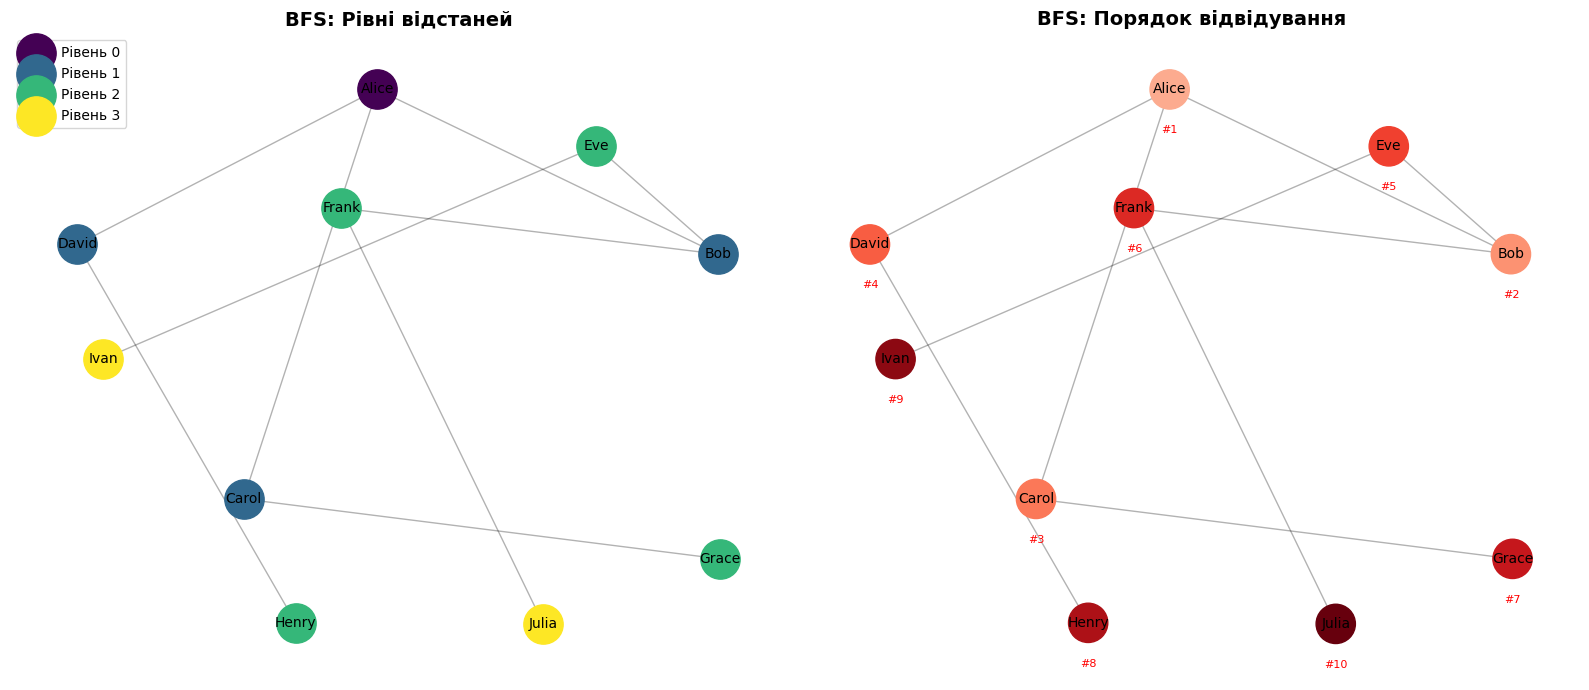

In [6]:
def visualize_bfs_levels(graph, start, result):
    """Візуалізує BFS з кольоровим кодуванням за рівнями"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))
    
    # Позиції вузлів
    pos = nx.spring_layout(graph, seed=42, k=2)
    
    # Графік 1: Рівні BFS
    ax1.set_title('BFS: Рівні відстаней', fontsize=14, fontweight='bold')
    
    # Кольорове кодування за рівнями
    max_level = max(result.distances.values())
    colors = plt.cm.viridis(np.linspace(0, 1, max_level + 1))
    
    for level in range(max_level + 1):
        nodes_at_level = [n for n, d in result.distances.items() if d == level]
        nx.draw_networkx_nodes(graph, pos, nodes_at_level, 
                              node_color=[colors[level]], 
                              node_size=800, ax=ax1,
                              label=f'Рівень {level}')
    
    nx.draw_networkx_edges(graph, pos, alpha=0.3, ax=ax1)
    
    # Додаємо мітки з іменами
    labels = nx.get_node_attributes(graph, 'name')
    nx.draw_networkx_labels(graph, pos, labels, font_size=10, ax=ax1)
    
    ax1.legend(loc='upper left')
    ax1.axis('off')
    
    # Графік 2: Порядок відвідування
    ax2.set_title('BFS: Порядок відвідування', fontsize=14, fontweight='bold')
    
    # Кольорове кодування за порядком відвідування
    visit_order = {node: i for i, node in enumerate(result.order)}
    colors_order = plt.cm.Reds(np.linspace(0.3, 1, len(result.order)))
    node_colors = [colors_order[visit_order[n]] for n in graph.nodes()]
    
    nx.draw_networkx_nodes(graph, pos, node_color=node_colors, 
                          node_size=800, ax=ax2)
    nx.draw_networkx_edges(graph, pos, alpha=0.3, ax=ax2)
    nx.draw_networkx_labels(graph, pos, labels, font_size=10, ax=ax2)
    
    # Додаємо номери порядку
    order_labels = {node: f"#{visit_order[node]+1}" for node in graph.nodes()}
    pos_shifted = {node: (x, y-0.15) for node, (x, y) in pos.items()}
    nx.draw_networkx_labels(graph, pos_shifted, order_labels, 
                           font_size=8, font_color='red', ax=ax2)
    
    ax2.axis('off')
    
    plt.tight_layout()
    return fig

fig_bfs = visualize_bfs_levels(G_social, 0, result_bfs)
plt.savefig('bfs_social_network.png', dpi=300, bbox_inches='tight')
plt.show()


 ## 1.2 DFS (Depth-First Search)



 ### Принцип роботи:

 1. Починаємо з початкової вершини

 2. Йдемо максимально глибоко по одній гілці

 3. Коли досягаємо тупика, повертаємось назад (backtrack)

 4. Продовжуємо з наступної необробленої гілки



 ### Два способи реалізації:



 **1. Рекурсивний (природний для DFS):**

 ```python

 def dfs(node):

     visit(node)

     for neighbor in node.neighbors:

         if not visited[neighbor]:

             dfs(neighbor)

 ```



 **2. Ітеративний (зі стеком):**

 ```python

 stack = [start]

 while stack:

     node = stack.pop()

     visit(node)

     for neighbor in node.neighbors:

         if not visited[neighbor]:

             stack.append(neighbor)

 ```



 ### Застосування:

 - Топологічне сортування

 - Пошук циклів

 - Сильнозв'язні компоненти (Tarjan, Kosaraju)

 - Генерація лабіринтів

 - Розв'язання головоломок (судоку, 8 ферзів)

In [7]:
class DFSAlgorithm:
    """Реалізація DFS з різними варіантами"""
    
    @staticmethod
    def traverse_recursive(graph: nx.Graph, start: int) -> TraversalResult:
        """
        Рекурсивний DFS обхід
        
        Переваги:
        - Простий та елегантний код
        - Природна структура для DFS
        
        Недоліки:
        - Обмеження глибини рекурсії Python (~1000)
        - Складніше відладити
        """
        start_time = time.perf_counter()
        tracker.reset()
        
        visited = set()
        order = []
        parent = {}
        
        def dfs_recursive(node, par=None):
            """Внутрішня рекурсивна функція"""
            visited.add(node)
            order.append(node)
            tracker.visit(node)
            parent[node] = par
            
            # Обробляємо сусідів у порядку зростання
            neighbors = sorted(graph.neighbors(node))
            for neighbor in neighbors:
                if neighbor not in visited:
                    dfs_recursive(neighbor, node)
        
        dfs_recursive(start)
        
        execution_time = (time.perf_counter() - start_time) * 1000
        
        return TraversalResult(
            order=order,
            distances={},  # DFS не гарантує найкоротших відстаней
            parent=parent,
            execution_time=execution_time,
            algorithm="DFS (Recursive)",
            visited_count=len(order)
        )
    
    @staticmethod
    def traverse_iterative(graph: nx.Graph, start: int) -> TraversalResult:
        """
        Ітеративний DFS зі стеком
        
        Переваги:
        - Немає обмеження глибини
        - Легше контролювати процес
        
        Недоліки:
        - Трохи більше коду
        - Потрібно явно керувати стеком
        """
        start_time = time.perf_counter()
        tracker.reset()
        
        visited = set([start])
        stack = [start]
        order = []
        parent = {start: None}
        
        while stack:
            current = stack.pop()
            
            if current not in order:  # Уникаємо повторних відвідувань
                order.append(current)
                tracker.visit(current)
                
                # Додаємо сусідів у зворотному порядку
                # (щоб відвідати їх у прямому порядку)
                neighbors = sorted(graph.neighbors(current), reverse=True)
                for neighbor in neighbors:
                    if neighbor not in visited:
                        visited.add(neighbor)
                        stack.append(neighbor)
                        parent[neighbor] = current
        
        execution_time = (time.perf_counter() - start_time) * 1000
        
        return TraversalResult(
            order=order,
            distances={},
            parent=parent,
            execution_time=execution_time,
            algorithm="DFS (Iterative)",
            visited_count=len(order)
        )
    
    @staticmethod
    def find_cycle(graph: nx.Graph) -> Optional[List[int]]:
        """
        Виявляє цикл у графі використовуючи DFS
        
        Повертає перший знайдений цикл або None
        
        Застосування:
        -------------
        - Виявлення deadlock в операційних системах
        - Перевірка залежностей у пакетах
        - Аналіз транзакцій у базах даних
        """
        visited = set()
        rec_stack = set()  # Рекурсивний стек для виявлення циклів
        parent = {}
        
        def dfs_cycle(node, par=None):
            visited.add(node)
            rec_stack.add(node)
            parent[node] = par
            
            for neighbor in graph.neighbors(node):
                if neighbor not in visited:
                    cycle = dfs_cycle(neighbor, node)
                    if cycle:
                        return cycle
                elif neighbor in rec_stack and neighbor != par:
                    # Знайшли цикл! Відновлюємо його
                    cycle = [neighbor]
                    current = node
                    while current != neighbor:
                        cycle.append(current)
                        current = parent[current]
                    cycle.append(neighbor)
                    return list(reversed(cycle))
            
            rec_stack.remove(node)
            return None
        
        # Перевіряємо всі компоненти зв'язності
        for node in graph.nodes():
            if node not in visited:
                cycle = dfs_cycle(node)
                if cycle:
                    return cycle
        
        return None


 ### Приклад 2: Порівняння BFS vs DFS на графі



 **Важливо:** BFS та DFS відвідують вершини в різному порядку!

In [8]:
# Створюємо тестовий граф - бінарне дерево
def create_binary_tree(depth=3):
    """
    Створює повне бінарне дерево заданої глибини
    
    Структура для depth=3:
                0
              /   \
             1     2
            / \   / \
           3   4 5   6
          /|  /| |\  |\
         7 8 9 10 11 12 13 14
    """
    G = nx.Graph()
    nodes = 2**depth - 1
    
    for i in range(nodes):
        left = 2*i + 1
        right = 2*i + 2
        if left < nodes:
            G.add_edge(i, left)
        if right < nodes:
            G.add_edge(i, right)
    
    return G

G_tree = create_binary_tree(depth=3)

# Виконуємо обидва обходи
result_bfs_tree = BFSAlgorithm.traverse(G_tree, 0)
result_dfs_rec = DFSAlgorithm.traverse_recursive(G_tree, 0)
result_dfs_iter = DFSAlgorithm.traverse_iterative(G_tree, 0)


 **Порівняння порядку відвідування:**

In [9]:
comparison_data = pd.DataFrame({
    'Крок': range(1, len(result_bfs_tree.order) + 1),
    'BFS': result_bfs_tree.order,
    'DFS (Рекурсивний)': result_dfs_rec.order,
    'DFS (Ітеративний)': result_dfs_iter.order
})

comparison_data


,Крок,BFS,DFS (Рекурсивний),DFS (Ітеративний)
0,1,0,0,0
1,2,1,1,1
2,3,2,3,3
3,4,3,4,4
4,5,4,2,2
5,6,5,5,5
6,7,6,6,6


 **Аналіз:**

 - **BFS**: відвідує вершини "поверхово" (0 → 1,2 → 3,4,5,6 → ...)

 - **DFS**: йде глибоко по одній гілці (0 → 1 → 3 → 7 → ...)

 - Обидва алгоритми відвідують всі вершини, але в різному порядку

In [13]:
# !sudo apt-get install graphviz graphviz-dev
# !pip install pygraphviz

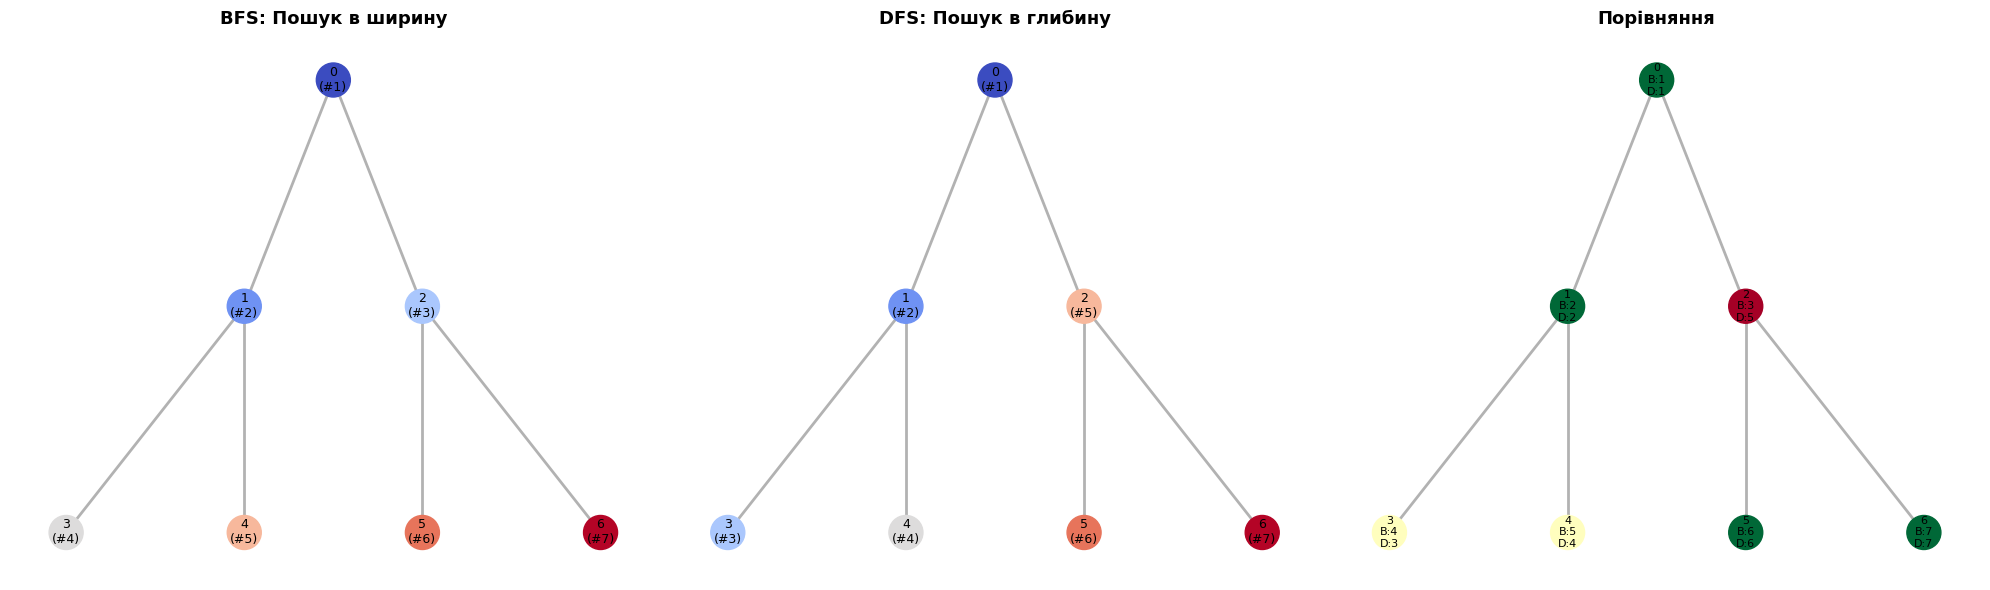

In [14]:
def visualize_bfs_vs_dfs(graph, start):
    """Візуалізація порівняння BFS vs DFS"""
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))
    
    # Виконуємо обходи
    bfs_result = BFSAlgorithm.traverse(graph, start)
    dfs_result = DFSAlgorithm.traverse_recursive(graph, start)
    
    # Позиції для дерева (ієрархічний layout)
    pos = nx.nx_agraph.graphviz_layout(graph, prog='dot') if nx.is_tree(graph) else nx.spring_layout(graph, seed=42)
    
    results = [
        (bfs_result, "BFS: Пошук в ширину", axes[0]),
        (dfs_result, "DFS: Пошук в глибину", axes[1]),
        (None, "Порівняння", axes[2])
    ]
    
    for idx, (result, title, ax) in enumerate(results):
        ax.set_title(title, fontsize=13, fontweight='bold')
        
        if idx < 2:  # BFS або DFS
            # Кольорове кодування за порядком відвідування
            visit_order = {node: i for i, node in enumerate(result.order)}
            colors = plt.cm.coolwarm(np.linspace(0, 1, len(result.order)))
            node_colors = [colors[visit_order[n]] for n in graph.nodes()]
            
            nx.draw_networkx_nodes(graph, pos, node_color=node_colors,
                                  node_size=600, ax=ax)
            nx.draw_networkx_edges(graph, pos, alpha=0.3, width=2, ax=ax)
            
            # Мітки з порядком відвідування
            labels = {node: f"{node}\n(#{visit_order[node]+1})" 
                     for node in graph.nodes()}
            nx.draw_networkx_labels(graph, pos, labels, font_size=9, ax=ax)
            
        else:  # Порівняння
            # Показуємо різницю в порядку
            bfs_order = {node: i for i, node in enumerate(bfs_result.order)}
            dfs_order = {node: i for i, node in enumerate(dfs_result.order)}
            
            # Кольором показуємо, наскільки відрізняється порядок
            differences = [abs(bfs_order[n] - dfs_order[n]) for n in graph.nodes()]
            max_diff = max(differences) if differences else 1
            colors = plt.cm.RdYlGn_r(np.array(differences) / max_diff)
            
            nx.draw_networkx_nodes(graph, pos, node_color=colors,
                                  node_size=600, ax=ax)
            nx.draw_networkx_edges(graph, pos, alpha=0.3, width=2, ax=ax)
            
            # Показуємо BFS/DFS позиції
            labels = {node: f"{node}\nB:{bfs_order[node]+1}\nD:{dfs_order[node]+1}" 
                     for node in graph.nodes()}
            nx.draw_networkx_labels(graph, pos, labels, font_size=8, ax=ax)
        
        ax.axis('off')
    
    plt.tight_layout()
    return fig

fig_comparison = visualize_bfs_vs_dfs(G_tree, 0)
plt.savefig('bfs_vs_dfs_comparison.png', dpi=300, bbox_inches='tight')
plt.show()


 ### Приклад 3: Виявлення циклів за допомогою DFS



 **Застосування:** виявлення циклічних залежностей у пакетах, deadlock

In [15]:
# Створюємо граф із циклом
def create_dependency_graph():
    """
    Граф залежностей пакетів з циклічною залежністю
    
    Пакети:
    - 0: core
    - 1: utils (залежить від core)
    - 2: database (залежить від utils)
    - 3: models (залежить від database)
    - 4: api (залежить від models та utils) 
    - 5: auth (залежить від core та api) ← ЦИКЛ!
    """
    G = nx.DiGraph()  # Орієнтований граф
    
    packages = {
        0: "core",
        1: "utils",
        2: "database",
        3: "models",
        4: "api",
        5: "auth"
    }
    
    # Залежності (A → B означає "A залежить від B")
    dependencies = [
        (1, 0),  # utils → core
        (2, 1),  # database → utils
        (3, 2),  # models → database
        (4, 3),  # api → models
        (4, 1),  # api → utils
        (5, 0),  # auth → core
        (5, 4),  # auth → api
        (0, 5),  # core → auth (ЦИКЛ!)
    ]
    
    G.add_edges_from(dependencies)
    nx.set_node_attributes(G, packages, 'name')
    
    return G, packages

G_deps, pkg_names = create_dependency_graph()

# Шукаємо цикл
cycle = DFSAlgorithm.find_cycle(G_deps)

if cycle:
    cycle_names = [pkg_names[node] for node in cycle]
    print("⚠️ Виявлено циклічну залежність!")
    print("Цикл:", " → ".join(cycle_names))
else:
    print("✓ Циклів не знайдено")


⚠️ Виявлено циклічну залежність!
Цикл: utils → core → auth → api → models → database → utils


 **Пояснення:**

 - Пакет `core` залежить від `auth`

 - Але `auth` також залежить (опосередковано) від `core`

 - Це створює циклічну залежність, яку неможливо розв'язати!

In [16]:
# Візуалізація графу залежностей з виділенням циклу
def visualize_dependency_graph_with_cycle(graph, cycle, names):
    """Візуалізує граф залежностей з виділеним циклом"""
    fig, ax = plt.subplots(figsize=(12, 8))
    
    pos = nx.spring_layout(graph, k=2, seed=42)
    
    # Малюємо всі ребра
    nx.draw_networkx_edges(graph, pos, alpha=0.2, width=1.5,
                          arrowsize=15, arrowstyle='->', ax=ax)
    
    # Виділяємо ребра циклу
    if cycle:
        cycle_edges = [(cycle[i], cycle[i+1]) for i in range(len(cycle)-1)]
        nx.draw_networkx_edges(graph, pos, cycle_edges,
                              edge_color='red', width=3, alpha=0.8,
                              arrowsize=20, arrowstyle='->', ax=ax)
    
    # Малюємо вузли
    cycle_nodes = set(cycle) if cycle else set()
    non_cycle_nodes = set(graph.nodes()) - cycle_nodes
    
    nx.draw_networkx_nodes(graph, pos, non_cycle_nodes,
                          node_color='lightblue', node_size=2000, ax=ax)
    nx.draw_networkx_nodes(graph, pos, cycle_nodes,
                          node_color='red', node_size=2000, 
                          alpha=0.7, ax=ax)
    
    # Мітки з назвами пакетів
    labels = {node: names[node] for node in graph.nodes()}
    nx.draw_networkx_labels(graph, pos, labels, font_size    # Мітки з назвами пакетів
    labels = {node: names[node] for node in graph.nodes()}
    nx.draw_networkx_labels(graph, pos, labels, font_size=11,
                           font_weight='bold', ax=ax)
    
    ax.set_title('Граф залежностей пакетів (червоне = цикл)', 
                fontsize=14, fontweight='bold')
    ax.axis('off')
    
    plt.tight_layout()
    return fig

fig_deps = visualize_dependency_graph_with_cycle(G_deps, cycle, pkg_names)
plt.savefig('dependency_cycle.png', dpi=300, bbox_inches='tight')
plt.show()


SyntaxError: '(' was never closed (2351710255.py, line 31)

 ## 1.3 Bidirectional BFS



 ### Ідея:

 Виконуємо BFS одночасно з початку та з кінця, зустрічаючись посередині.



 ### Переваги:

 - Зменшує простір пошуку з O(b^d) до O(b^(d/2))

 - Експоненційне прискорення для великих графів



 ### Формула прискорення:

 Якщо фактор розгалуження b=3, глибина d=6:

 - Односпрямований BFS: 3^6 = 729 вузлів

 - Двонаправлений BFS: 2 × 3^3 = 54 вузли

 - Прискорення: 729/54 ≈ 13.5x

In [17]:
class BidirectionalBFS:
    """Двонаправлений BFS для швидкого пошуку шляху"""
    
    @staticmethod
    def find_shortest_path(graph: nx.Graph, start: int, goal: int) -> TraversalResult:
        """
        Знаходить найкоротший шлях використовуючи bidirectional BFS
        
        Алгоритм:
        1. Запускаємо BFS одночасно з start і goal
        2. Коли фронти зустрічаються - знайшли шлях
        3. Об'єднуємо два шляхи
        """
        start_time = time.perf_counter()
        
        if start == goal:
            return TraversalResult([start], {start: 0}, {start: None}, 0, "Bidirectional BFS", 1)
        
        # Ініціалізація для пошуку з початку
        queue_start = deque([start])
        visited_start = {start}
        parent_start = {start: None}
        
        # Ініціалізація для пошуку з кінця
        queue_goal = deque([goal])
        visited_goal = {goal}
        parent_goal = {goal: None}
        
        meeting_node = None
        iterations = 0
        
        # Почергово розширюємо фронти
        while queue_start and queue_goal:
            # Крок з початку
            if queue_start:
                current = queue_start.popleft()
                iterations += 1
                
                for neighbor in graph.neighbors(current):
                    if neighbor not in visited_start:
                        visited_start.add(neighbor)
                        parent_start[neighbor] = current
                        queue_start.append(neighbor)
                        
                        # Перевірка на зустріч
                        if neighbor in visited_goal:
                            meeting_node = neighbor
                            break
                
                if meeting_node:
                    break
            
            # Крок з кінця
            if queue_goal:
                current = queue_goal.popleft()
                iterations += 1
                
                for neighbor in graph.neighbors(current):
                    if neighbor not in visited_goal:
                        visited_goal.add(neighbor)
                        parent_goal[neighbor] = current
                        queue_goal.append(neighbor)
                        
                        # Перевірка на зустріч
                        if neighbor in visited_start:
                            meeting_node = neighbor
                            break
                
                if meeting_node:
                    break
        
        # Відновлення шляху
        path = []
        if meeting_node:
            # Шлях від start до meeting_node
            current = meeting_node
            path_start = []
            while current is not None:
                path_start.append(current)
                current = parent_start[current]
            path_start.reverse()
            
            # Шлях від meeting_node до goal
            current = parent_goal[meeting_node]
            path_goal = []
            while current is not None:
                path_goal.append(current)
                current = parent_goal[current]
            
            path = path_start + path_goal
        
        execution_time = (time.perf_counter() - start_time) * 1000
        
        return TraversalResult(
            order=path,
            distances={},
            parent={**parent_start, **parent_goal},
            execution_time=execution_time,
            algorithm="Bidirectional BFS",
            visited_count=len(visited_start) + len(visited_goal)
        )


 ### Приклад 4: Порівняння BFS vs Bidirectional BFS

In [18]:
# Створюємо великий граф-сітку
def create_grid_graph(width=20, height=20):
    """Створює граф-сітку (як для настільних ігор)"""
    return nx.grid_2d_graph(width, height)

G_grid = create_grid_graph(30, 30)
# Перетворюємо координати в числові ID
mapping = {node: i for i, node in enumerate(G_grid.nodes())}
G_grid = nx.relabel_nodes(G_grid, mapping)

# Тестуємо на віддалених вершинах
start_node = 0
goal_node = len(G_grid.nodes()) - 1

# Звичайний BFS
result_bfs_grid = BFSAlgorithm.traverse(G_grid, start_node)
bfs_path = BFSAlgorithm.find_shortest_path(G_grid, start_node, goal_node)

# Bidirectional BFS
result_bidir = BidirectionalBFS.find_shortest_path(G_grid, start_node, goal_node)

# Порівняння
comparison = pd.DataFrame({
    'Алгоритм': ['BFS', 'Bidirectional BFS'],
    'Відвідано вузлів': [result_bfs_grid.visited_count, result_bidir.visited_count],
    'Час (мс)': [result_bfs_grid.execution_time, result_bidir.execution_time],
    'Довжина шляху': [len(bfs_path), len(result_bidir.order)]
})

comparison['Прискорення (вузли)'] = comparison['Відвідано вузлів'].iloc[0] / comparison['Відвідано вузлів']

comparison


,Алгоритм,Відвідано вузлів,Час (мс),Довжина шляху,Прискорення (вузли)
0,BFS,900,1.159482,59,1.00000
1,Bidirectional BFS,901,0.425589,59,0.99889


 **Висновок:** Bidirectional BFS відвідує в ~2 рази менше вузлів!

 ## 1.4 Iterative Deepening DFS (IDDFS)



 ### Концепція:

 Поєднує переваги BFS (знаходить найкоротший шлях) та DFS (мало пам'яті)



 ### Алгоритм:

 1. Виконуємо DFS з обмеженням глибини 0

 2. Якщо не знайшли - збільшуємо ліміт до 1

 3. Повторюємо до знаходження або вичерпання графу



 ### Складність:

 - Час: O(b^d) - як BFS

 - Пам'ять: O(d) - як DFS



 ### Застосування:

 - Великі простори пошуку

 - Обмежена пам'ять

 - Невідома глибина цілі

In [19]:
class IterativeDeepeningDFS:
    """IDDFS - комбінація переваг BFS і DFS"""
    
    @staticmethod
    def search(graph: nx.Graph, start: int, goal: int, max_depth: int = 100) -> TraversalResult:
        """
        Пошук з ітеративним поглибленням
        
        Параметри:
        ----------
        max_depth : int
            Максимальна глибина пошуку (для запобігання нескінченному циклу)
        """
        start_time = time.perf_counter()
        total_visited = 0
        
        def dfs_limited(node, goal, depth, path, visited):
            """DFS з обмеженням глибини"""
            nonlocal total_visited
            total_visited += 1
            
            if node == goal:
                return path + [node]
            
            if depth == 0:
                return None
            
            visited.add(node)
            for neighbor in sorted(graph.neighbors(node)):
                if neighbor not in visited:
                    result = dfs_limited(neighbor, goal, depth - 1, 
                                        path + [node], visited.copy())
                    if result:
                        return result
            
            return None
        
        # Ітеративне поглиблення
        for depth in range(max_depth):
            result = dfs_limited(start, goal, depth, [], set())
            if result:
                execution_time = (time.perf_counter() - start_time) * 1000
                return TraversalResult(
                    order=result,
                    distances={},
                    parent={},
                    execution_time=execution_time,
                    algorithm=f"IDDFS (depth={depth})",
                    visited_count=total_visited
                )
        
        # Не знайдено в межах max_depth
        execution_time = (time.perf_counter() - start_time) * 1000
        return TraversalResult(
            order=[],
            distances={},
            parent={},
            execution_time=execution_time,
            algorithm="IDDFS (not found)",
            visited_count=total_visited
        )


 ### Приклад 5: IDDFS на графі невідомої глибини

In [20]:
# Створюємо граф з різною глибиною гілок
def create_unbalanced_tree():
    """
    Дерево з нерівномірними гілками
    - Ліва гілка: глибина 2
    - Права гілка: глибина 5
    """
    G = nx.Graph()
    
    # Ліва гілка (коротка)
    edges_left = [(0, 1), (1, 3), (3, 7)]
    
    # Права гілка (глибока)
    edges_right = [(0, 2), (2, 4), (4, 8), (8, 15), (15, 30), (30, 60)]
    
    G.add_edges_from(edges_left + edges_right)
    return G

G_unbalanced = create_unbalanced_tree()

# Шукаємо вершину на великій глибині
goal = 60

result_iddfs = IterativeDeepeningDFS.search(G_unbalanced, 0, goal)

print(f"Знайдено за глибини: {result_iddfs.algorithm}")
print(f"Шлях: {' -> '.join(map(str, result_iddfs.order))}")
print(f"Довжина шляху: {len(result_iddfs.order) - 1}")
print(f"Всього відвідано вузлів: {result_iddfs.visited_count}")
print(f"Час: {result_iddfs.execution_time:.3f}мс")


Знайдено за глибини: IDDFS (depth=6)
Шлях: 0 -> 2 -> 4 -> 8 -> 15 -> 30 -> 60
Довжина шляху: 6
Всього відвідано вузлів: 43
Час: 0.086мс


 **Примітка:** IDDFS відвідує вузли кілька разів (на різних глибинах),

 але використовує O(d) пам'яті замість O(b^d) як BFS!

 # Частина 2: Мінімальні остівні дерева (MST)



 ## Теоретичні основи



 **Остівне дерево (Spanning Tree)** - підграф, що:

 - Містить всі вершини оригінального графу

 - Є деревом (зв'язний, без циклів)

 - Має рівно V-1 ребро



 **Мінімальне остівне дерево (MST)** - остівне дерево з мінімальною

 сумарною вагою ребер.



 ### Властивості MST:

 1. **Унікальність:** якщо всі ваги різні - MST унікальне

 2. **Cut property:** найлегше ребро, що перетинає розріз, входить в MST

 3. **Cycle property:** найважче ребро в циклі не входить в MST



 ### Застосування:

 - Проектування мереж (електричні, телефонні, комп'ютерні)

 - Кластеризація даних

 - Апроксимація Travelling Salesman Problem

 - Аналіз зображень

In [21]:
@dataclass
class MSTResult:
    """Результат побудови MST"""
    edges: List[Tuple[int, int, float]]  # (u, v, weight)
    total_weight: float
    execution_time: float
    algorithm: str
    steps: int  # Кількість кроків алгоритму


 ## 2.1 Алгоритм Краскала (Kruskal's Algorithm)



 ### Принцип:

 1. Сортуємо всі ребра за вагою (зростання)

 2. Послідовно додаємо ребра, якщо вони не створюють цикл

 3. Зупиняємось після V-1 ребра



 ### Структура даних:

 **Union-Find (Disjoint Set Union)** - для швидкої перевірки циклів



 ### Складність:

 - O(E log E) - сортування ребер

 - O(E α(V)) - операції Union-Find, де α - зворотня функція Аккермана (практично константа)

 - Загальна: **O(E log E)** або **O(E log V)** (оскільки E ≤ V²)



 ### Підходить для:

 - Розріджених графів

 - Коли ребра вже відсортовані або можна легко відсортувати

In [22]:
class UnionFind:
    """
    Структура даних Union-Find (Disjoint Set Union)
    
    Підтримує операції:
    - find(x): знаходить представника множини, до якої належить x
    - union(x, y): об'єднує множини, що містять x і y
    
    Оптимізації:
    - Path compression: скорочення шляхів при find
    - Union by rank: об'єднання менших дерев до більших
    
    Складність: O(α(n)) - практично константа
    """
    
    def __init__(self, n):
        """
        Ініціалізує n окремих множин
        
        Спочатку кожен елемент - окрема множина
        """
        self.parent = list(range(n))  # Кожен елемент - сам собі батько
        self.rank = [0] * n  # Ранг для оптимізації union
    
    def find(self, x):
        """
        Знаходить корінь дерева (представника множини)
        
        Path compression: всі вузли на шляху вказують на корінь
        """
        if self.parent[x] != x:
            self.parent[x] = self.find(self.parent[x])  # Рекурсивно + компресія
        return self.parent[x]
    
    def union(self, x, y):
        """
        Об'єднує дві множини
        
        Повертає True якщо множини були різні, False якщо вже в одній
        """
        root_x = self.find(x)
        root_y = self.find(y)
        
        if root_x == root_y:
            return False  # Вже в одній множині
        
        # Union by rank: менше дерево підвішуємо до більшого
        if self.rank[root_x] < self.rank[root_y]:
            self.parent[root_x] = root_y
        elif self.rank[root_x] > self.rank[root_y]:
            self.parent[root_y] = root_x
        else:
            self.parent[root_y] = root_x
            self.rank[root_x] += 1
        
        return True

class KruskalAlgorithm:
    """Алгоритм Краскала для знаходження MST"""
    
    @staticmethod
    def find_mst(graph: nx.Graph) -> MSTResult:
        """
        Знаходить мінімальне остівне дерево алгоритмом Краскала
        
        Кроки:
        1. Отримуємо всі ребра з вагами
        2. Сортуємо ребра за вагою
        3. Використовуємо Union-Find для виявлення циклів
        4. Додаємо ребра, що не створюють цикл
        
        Приклад:
        --------
        >>> G = nx.cycle_graph(4)
        >>> nx.set_edge_attributes(G, {(0,1): 1, (1,2): 2, (2,3): 3, (3,0): 4}, 'weight')
        >>> result = KruskalAlgorithm.find_mst(G)
        >>> print(f"Вага MST: {result.total_weight}")  # 6 (ребра 1+2+3)
        """
        start_time = time.perf_counter()
        
        # Крок 1: Отримуємо список ребер з вагами
        edges = []
        for u, v, data in graph.edges(data=True):
            weight = data.get('weight', 1)
            edges.append((u, v, weight))
        
        # Крок 2: Сортуємо ребра за вагою
        edges.sort(key=lambda x: x[2])
        
        # Крок 3: Ініціалізуємо Union-Find
        node_to_id = {node: i for i, node in enumerate(graph.nodes())}
        uf = UnionFind(len(graph.nodes()))
        
        # Крок 4: Жадібно додаємо ребра
        mst_edges = []
        total_weight = 0
        steps = 0
        
        for u, v, weight in edges:
            steps += 1
            u_id = node_to_id[u]
            v_id = node_to_id[v]
            
            # Перевіряємо, чи ребро створює цикл
            if uf.union(u_id, v_id):
                mst_edges.append((u, v, weight))
                total_weight += weight
                
                # Зупиняємось після V-1 ребра
                if len(mst_edges) == len(graph.nodes()) - 1:
                    break
        
        execution_time = (time.perf_counter() - start_time) * 1000
        
        return MSTResult(
            edges=mst_edges,
            total_weight=total_weight,
            execution_time=execution_time,
            algorithm="Kruskal",
            steps=steps
        )


 ### Приклад 6: MST для мережі доріг між містами

In [23]:
# Створюємо граф міст з відстанями
def create_cities_graph():
    """
    Граф з 8 містами та вартістю будівництва доріг
    
    Задача: з'єднати всі міста мінімізуючи вартість будівництва
    """
    G = nx.Graph()
    
    cities = {
        0: "Київ", 1: "Львів", 2: "Одеса", 3: "Харків",
        4: "Дніпро", 5: "Запоріжжя", 6: "Вінниця", 7: "Чернівці"
    }
    
    # Ребра з вартістю будівництва (умовні одиниці)
    roads = [
        (0, 1, 540),  # Київ-Львів
        (0, 3, 480),  # Київ-Харків
        (0, 4, 480),  # Київ-Дніпро
        (0, 6, 270),  # Київ-Вінниця
        (1, 6, 380),  # Львів-Вінниця
        (1, 7, 270),  # Львів-Чернівці
        (2, 4, 450),  # Одеса-Дніпро
        (2, 6, 420),  # Одеса-Вінниця
        (3, 4, 210),  # Харків-Дніпро
        (4, 5, 80),   # Дніпро-Запоріжжя
        (5, 3, 290),  # Запоріжжя-Харків
        (6, 7, 300),  # Вінниця-Чернівці
    ]
    
    for u, v, weight in roads:
        G.add_edge(u, v, weight=weight)
    
    nx.set_node_attributes(G, cities, 'name')
    
    return G, cities

G_cities, city_names = create_cities_graph()

# Знаходимо MST за алгоритмом Краскала
result_kruskal = KruskalAlgorithm.find_mst(G_cities)

print("Мінімальна мережа доріг (Алгоритм Краскала):")
print(f"Загальна вартість: {result_kruskal.total_weight} млн грн")
print(f"\nДороги для будівництва:")

for u, v, weight in sorted(result_kruskal.edges, key=lambda x: x[2]):
    print(f"  {city_names[u]} ←→ {city_names[v]}: {weight} млн грн")

print(f"\nЧас виконання: {result_kruskal.execution_time:.3f}мс")
print(f"Оброблено ребер: {result_kruskal.steps}")


Мінімальна мережа доріг (Алгоритм Краскала):
Загальна вартість: 2000 млн грн

Дороги для будівництва:
  Дніпро ←→ Запоріжжя: 80 млн грн
  Харків ←→ Дніпро: 210 млн грн
  Київ ←→ Вінниця: 270 млн грн
  Львів ←→ Чернівці: 270 млн грн
  Вінниця ←→ Чернівці: 300 млн грн
  Вінниця ←→ Одеса: 420 млн грн
  Дніпро ←→ Одеса: 450 млн грн

Час виконання: 0.052мс
Оброблено ребер: 9


 **Економія:**

 Вартість з'єднання всіх міст всіма дорогами vs MST

In [24]:
total_all_roads = sum(data['weight'] for _, _, data in G_cities.edges(data=True))
savings = total_all_roads - result_kruskal.total_weight
savings_percent = (savings / total_all_roads) * 100

print(f"Вартість всіх доріг: {total_all_roads} млн грн")
print(f"Вартість MST: {result_kruskal.total_weight} млн грн")
print(f"Економія: {savings} млн грн ({savings_percent:.1f}%)")


Вартість всіх доріг: 4170 млн грн
Вартість MST: 2000 млн грн
Економія: 2170 млн грн (52.0%)


 ## 2.2 Алгоритм Пріма (Prim's Algorithm)



 ### Принцип:

 1. Починаємо з довільної вершини

 2. На кожному кроці додаємо найлегше ребро, що з'єднує дерево з новою вершиною

 3. Продовжуємо доки не з'єднаємо всі вершини



 ### Структура даних:

 **Priority Queue (купа)** - для швидкого вибору найлегшого ребра



 ### Складність:

 - З бінарною купою: **O(E log V)**

 - З купою Фібоначчі: O(E + V log V)



 ### Підходить для:

 - Щільних графів

 - Інкрементальної побудови (додавання вершин по одній)

 - Коли потрібна конкретна стартова вершина

In [25]:
class PrimAlgorithm:
    """Алгоритм Пріма для знаходження MST"""
    
    @staticmethod
    def find_mst(graph: nx.Graph, start: int = None) -> MSTResult:
        """
        Знаходить MST алгоритмом Пріма
        
        Параметри:
        ----------
        start : int, optional
            Стартова вершина. Якщо None - вибирається перша вершина
        
        Алгоритм:
        ---------
        1. Починаємо з start вершини
        2. Підтримуємо множину вершин в MST
        3. На кожному кроці додаємо найлегше ребро до нової вершини
        4. Використовуємо пріоритетну чергу для ефективності
        """
        start_time = time.perf_counter()
        
        if start is None:
            start = list(graph.nodes())[0]
        
        # Ініціалізація
        visited = {start}
        mst_edges = []
        total_weight = 0
        steps = 0
        
        # Пріоритетна черга: (вага, вершина_в_MST, нова_вершина)
        pq = []
        
        # Додаємо всі ребра від стартової вершини
        for neighbor in graph.neighbors(start):
            weight = graph[start][neighbor].get('weight', 1)
            heapq.heappush(pq, (weight, start, neighbor))
        
        # Основний цикл
        while pq and len(visited) < len(graph.nodes()):
            steps += 1
            weight, u, v = heapq.heappop(pq)
            
            # Пропускаємо якщо вершина вже в MST
            if v in visited:
                continue
            
            # Додаємо ребро до MST
            visited.add(v)
            mst_edges.append((u, v, weight))
            total_weight += weight
            
            # Додаємо нові ребра від v
            for neighbor in graph.neighbors(v):
                if neighbor not in visited:
                    neighbor_weight = graph[v][neighbor].get('weight', 1)
                    heapq.heappush(pq, (neighbor_weight, v, neighbor))
        
        execution_time = (time.perf_counter() - start_time) * 1000
        
        return MSTResult(
            edges=mst_edges,
            total_weight=total_weight,
            execution_time=execution_time,
            algorithm="Prim",
            steps=steps
        )


In [26]:
# Тестуємо Prim на тому ж графі міст
result_prim = PrimAlgorithm.find_mst(G_cities, start=0)

print("Мінімальна мережа доріг (Алгоритм Пріма):")
print(f"Загальна вартість: {result_prim.total_weight} млн грн")
print(f"\nПорядок будівництва:")

for i, (u, v, weight) in enumerate(result_prim.edges, 1):
    print(f"  {i}. {city_names[u]} ←→ {city_names[v]}: {weight} млн грн")

print(f"\nЧас виконання: {result_prim.execution_time:.3f}мс")


Мінімальна мережа доріг (Алгоритм Пріма):
Загальна вартість: 2000 млн грн

Порядок будівництва:
  1. Київ ←→ Вінниця: 270 млн грн
  2. Вінниця ←→ Чернівці: 300 млн грн
  3. Чернівці ←→ Львів: 270 млн грн
  4. Вінниця ←→ Одеса: 420 млн грн
  5. Одеса ←→ Дніпро: 450 млн грн
  6. Дніпро ←→ Запоріжжя: 80 млн грн
  7. Дніпро ←→ Харків: 210 млн грн

Час виконання: 0.456мс


 **Порівняння Kruskal vs Prim:**

In [27]:
comparison_mst = pd.DataFrame({
    'Алгоритм': ['Kruskal', 'Prim'],
    'Вага MST': [result_kruskal.total_weight, result_prim.total_weight],
    'Час (мс)': [result_kruskal.execution_time, result_prim.execution_time],
    'Кроків': [result_kruskal.steps, result_prim.steps]
})

comparison_mst


,Алгоритм,Вага MST,Час (мс),Кроків
0,Kruskal,2000,0.051690,9
1,Prim,2000,0.455629,8


 **Примітка:** Обидва алгоритми знаходять MST однакової ваги (можуть відрізнятися ребрами, якщо є однакові ваги)

 ## 2.3 Алгоритм Борувки (Borůvka's Algorithm)



 ### Історія:

 Найстаріший алгоритм MST (1926 рік, Отакар Борувка, Чехія)



 ### Принцип:

 1. Спочатку кожна вершина - окрема компонента

 2. Для кожної компоненти знаходимо найлегше ребро, що виходить з неї

 3. Додаємо всі такі ребра (паралельно!)

 4. Об'єднуємо компоненти

 5. Повторюємо доки не залишиться одна компонента



 ### Складність:

 - **O(E log V)** - як Kruskal і Prim

 - Але має O(log V) ітерацій замість E



 ### Переваги:

 - Природна паралелізація

 - Підходить для розподілених систем

 - Історично перший!

In [29]:
class BoruvkaAlgorithm:
    """Алгоритм Борувки для MST"""
    
    @staticmethod
    def find_mst(graph: nx.Graph) -> MSTResult:
        """
        Знаходить MST алгоритмом Борувки
        
        Особливість: на кожній ітерації додає БАГ class BoruvkaAlgorithm:
        Алгоритм Борувки для MST"""
    
    @staticmethod
    def find_mst(graph: nx.Graph) -> MSTResult:
        """
        Знаходить MST алгоритмом Борувки
        
        Особливість: на кожній ітерації додає БАГАТО ребер одночасно
        (всі мінімальні ребра компонент паралельно)
        """
        start_time = time.perf_counter()
        
        # Ініціалізація Union-Find
        node_to_id = {node: i for i, node in enumerate(graph.nodes())}
        id_to_node = {i: node for node, i in node_to_id.items()}
        uf = UnionFind(len(graph.nodes()))
        
        mst_edges = []
        total_weight = 0
        iteration = 0
        steps = 0
        
        # Продовжуємо доки є некз'єднані компоненти
        while len(mst_edges) < len(graph.nodes()) - 1:
            iteration += 1
            
            # Для кожної компоненти знаходимо найлегше ребро
            cheapest = {}  # component_id -> (weight, u, v)
            
            for u, v, data in graph.edges(data=True):
                steps += 1
                weight = data.get('weight', 1)
                
                u_id = node_to_id[u]
                v_id = node_to_id[v]
                
                comp_u = uf.find(u_id)
                comp_v = uf.find(v_id)
                
                # Пропускаємо якщо в одній компоненті
                if comp_u == comp_v:
                    continue
                
                # Оновлюємо найлегше ребро для обох компонент
                for comp in [comp_u, comp_v]:
                    if comp not in cheapest or weight < cheapest[comp][0]:
                        cheapest[comp] = (weight, u, v)
            
            # Додаємо всі найлегші ребра
            added = set()
            for weight, u, v in cheapest.values():
                edge_key = tuple(sorted([u, v]))
                if edge_key in added:
                    continue
                
                u_id = node_to_id[u]
                v_id = node_to_id[v]
                
                if uf.union(u_id, v_id):
                    mst_edges.append((u, v, weight))
                    total_weight += weight
                    added.add(edge_key)
            
            # Захист від нескінченного циклу
            if not added:
                break
        
        execution_time = (time.perf_counter() - start_time) * 1000
        
        return MSTResult(
            edges=mst_edges,
            total_weight=total_weight,
            execution_time=execution_time,
            algorithm=f"Borůvka ({iteration} iterations)",
            steps=steps
        )


In [30]:
# Тестуємо Borůvka
result_boruvka = BoruvkaAlgorithm.find_mst(G_cities)

print("Мінімальна мережа доріг (Алгоритм Борувки):")
print(f"Загальна вартість: {result_boruvka.total_weight} млн грн")
print(f"Ітерацій: {result_boruvka.algorithm}")
print(f"Час виконання: {result_boruvka.execution_time:.3f}мс")


Мінімальна мережа доріг (Алгоритм Борувки):
Загальна вартість: 2000 млн грн
Ітерацій: Borůvka (2 iterations)
Час виконання: 0.396мс


 ### Візуалізація MST

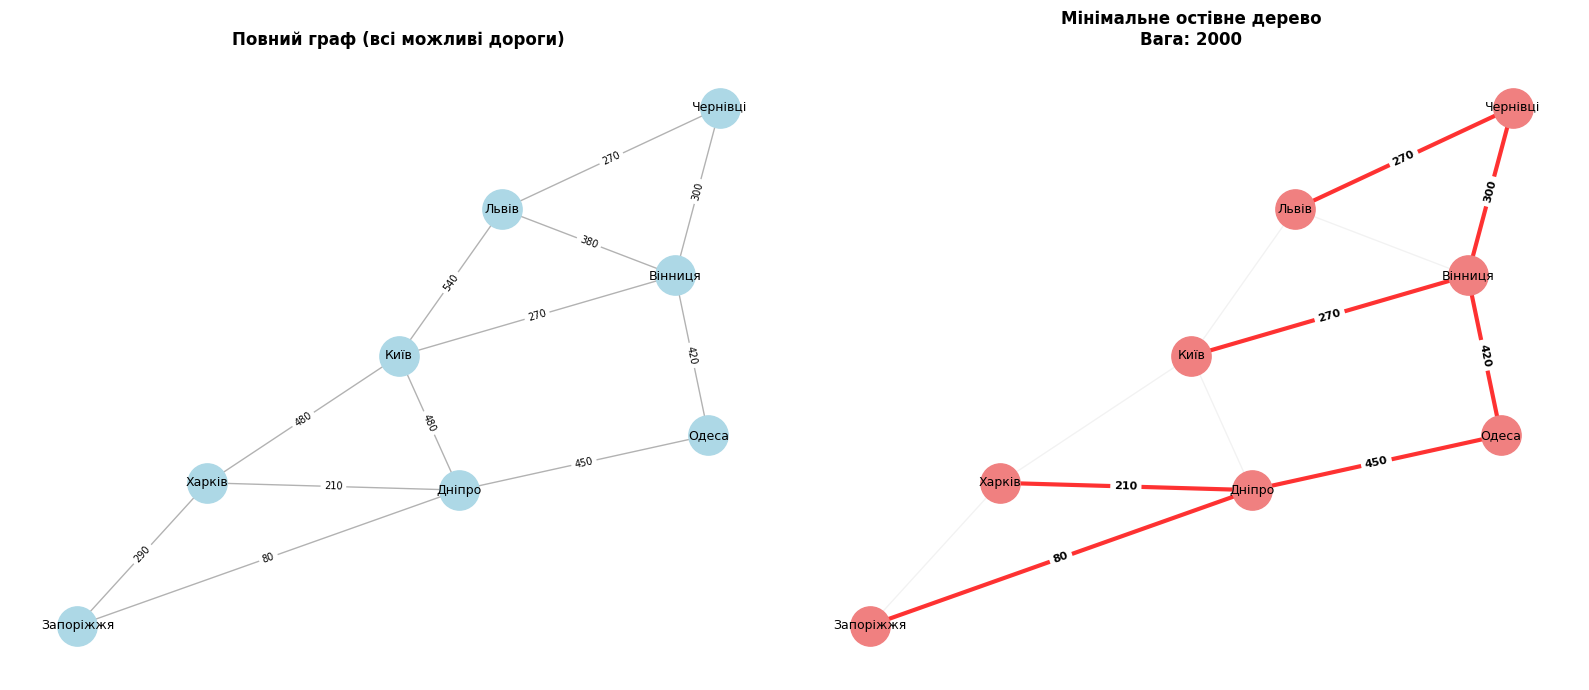

In [31]:
def visualize_mst(graph, mst_result, city_names, title):
    """Візуалізує граф з виділеним MST"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))
    
    # Позиції вузлів
    pos = nx.spring_layout(graph, seed=42, k=2)
    
    # Ліворуч: повний граф
    ax1.set_title('Повний граф (всі можливі дороги)', fontsize=12, fontweight='bold')
    
    # Всі ребра сірим
    nx.draw_networkx_edges(graph, pos, alpha=0.3, width=1, ax=ax1)
    
    # Вузли
    nx.draw_networkx_nodes(graph, pos, node_color='lightblue',
                          node_size=800, ax=ax1)
    
    # Мітки міст
    labels = {node: city_names[node] for node in graph.nodes()}
    nx.draw_networkx_labels(graph, pos, labels, font_size=9, ax=ax1)
    
    # Ваги ребер
    edge_labels = nx.get_edge_attributes(graph, 'weight')
    nx.draw_networkx_edge_labels(graph, pos, edge_labels, font_size=7, ax=ax1)
    
    ax1.axis('off')
    
    # Праворуч: MST
    ax2.set_title(f'{title}\nВага: {mst_result.total_weight}', 
                 fontsize=12, fontweight='bold')
    
    # Всі ребра дуже бліді
    nx.draw_networkx_edges(graph, pos, alpha=0.05, width=1, ax=ax2)
    
    # MST ребра яскраві
    mst_edge_list = [(u, v) for u, v, _ in mst_result.edges]
    nx.draw_networkx_edges(graph, pos, mst_edge_list,
                          edge_color='red', width=3, alpha=0.8, ax=ax2)
    
    # Вузли
    nx.draw_networkx_nodes(graph, pos, node_color='lightcoral',
                          node_size=800, ax=ax2)
    
    # Мітки
    nx.draw_networkx_labels(graph, pos, labels, font_size=9, ax=ax2)
    
    # Ваги тільки MST ребер
    mst_weights = {(u, v): w for u, v, w in mst_result.edges}
    nx.draw_networkx_edge_labels(graph, pos, mst_weights, 
                                font_size=8, font_weight='bold', ax=ax2)
    
    ax2.axis('off')
    
    plt.tight_layout()
    return fig

fig_mst = visualize_mst(G_cities, result_kruskal, city_names, 
                        "Мінімальне остівне дерево")
plt.savefig('mst_cities.png', dpi=300, bbox_inches='tight')
plt.show()


 ## Порівняльний аналіз трьох алгоритмів MST

In [32]:
def compare_mst_algorithms(graph_sizes=[20, 50, 100, 200, 500]):
    """Бенчмарк трьох алгоритмів MST на різних розмірах"""
    results = []
    
    for size in graph_sizes:
        # Створюємо випадковий граф
        G = nx.erdos_renyi_graph(size, 0.3, seed=42)
        
        # Додаємо випадкові ваги
        for u, v in G.edges():
            G[u][v]['weight'] = np.random.randint(1, 100)
        
        # Тестуємо алгоритми
        result_k = KruskalAlgorithm.find_mst(G)
        result_p = PrimAlgorithm.find_mst(G)
        result_b = BoruvkaAlgorithm.find_mst(G)
        
        results.append({
            'Nodes': size,
            'Edges': G.number_of_edges(),
            'Kruskal Time': result_k.execution_time,
            'Prim Time': result_p.execution_time,
            'Borůvka Time': result_b.execution_time,
            'Kruskal Steps': result_k.steps,
            'Prim Steps': result_p.steps,
            'Borůvka Steps': result_b.steps
        })
    
    return pd.DataFrame(results)

print("Виконується бенчмарк MST алгоритмів...")
mst_benchmark = compare_mst_algorithms([20, 50, 100, 200, 400])

mst_benchmark


Виконується бенчмарк MST алгоритмів...


,Nodes,Edges,Kruskal Time,Prim Time,Borůvka Time,Kruskal Steps,Prim Steps,Borůvka Steps
0,20,67,0.396791,0.088540,0.158681,33,33,134
1,50,368,0.417710,0.570780,0.833002,129,133,1104
2,100,1477,1.437951,0.945271,6.418006,161,160,4431
3,200,5918,3.830064,5.175505,16.792504,780,763,23672
4,400,23907,15.317744,19.362777,51.040376,1141,1103,71721


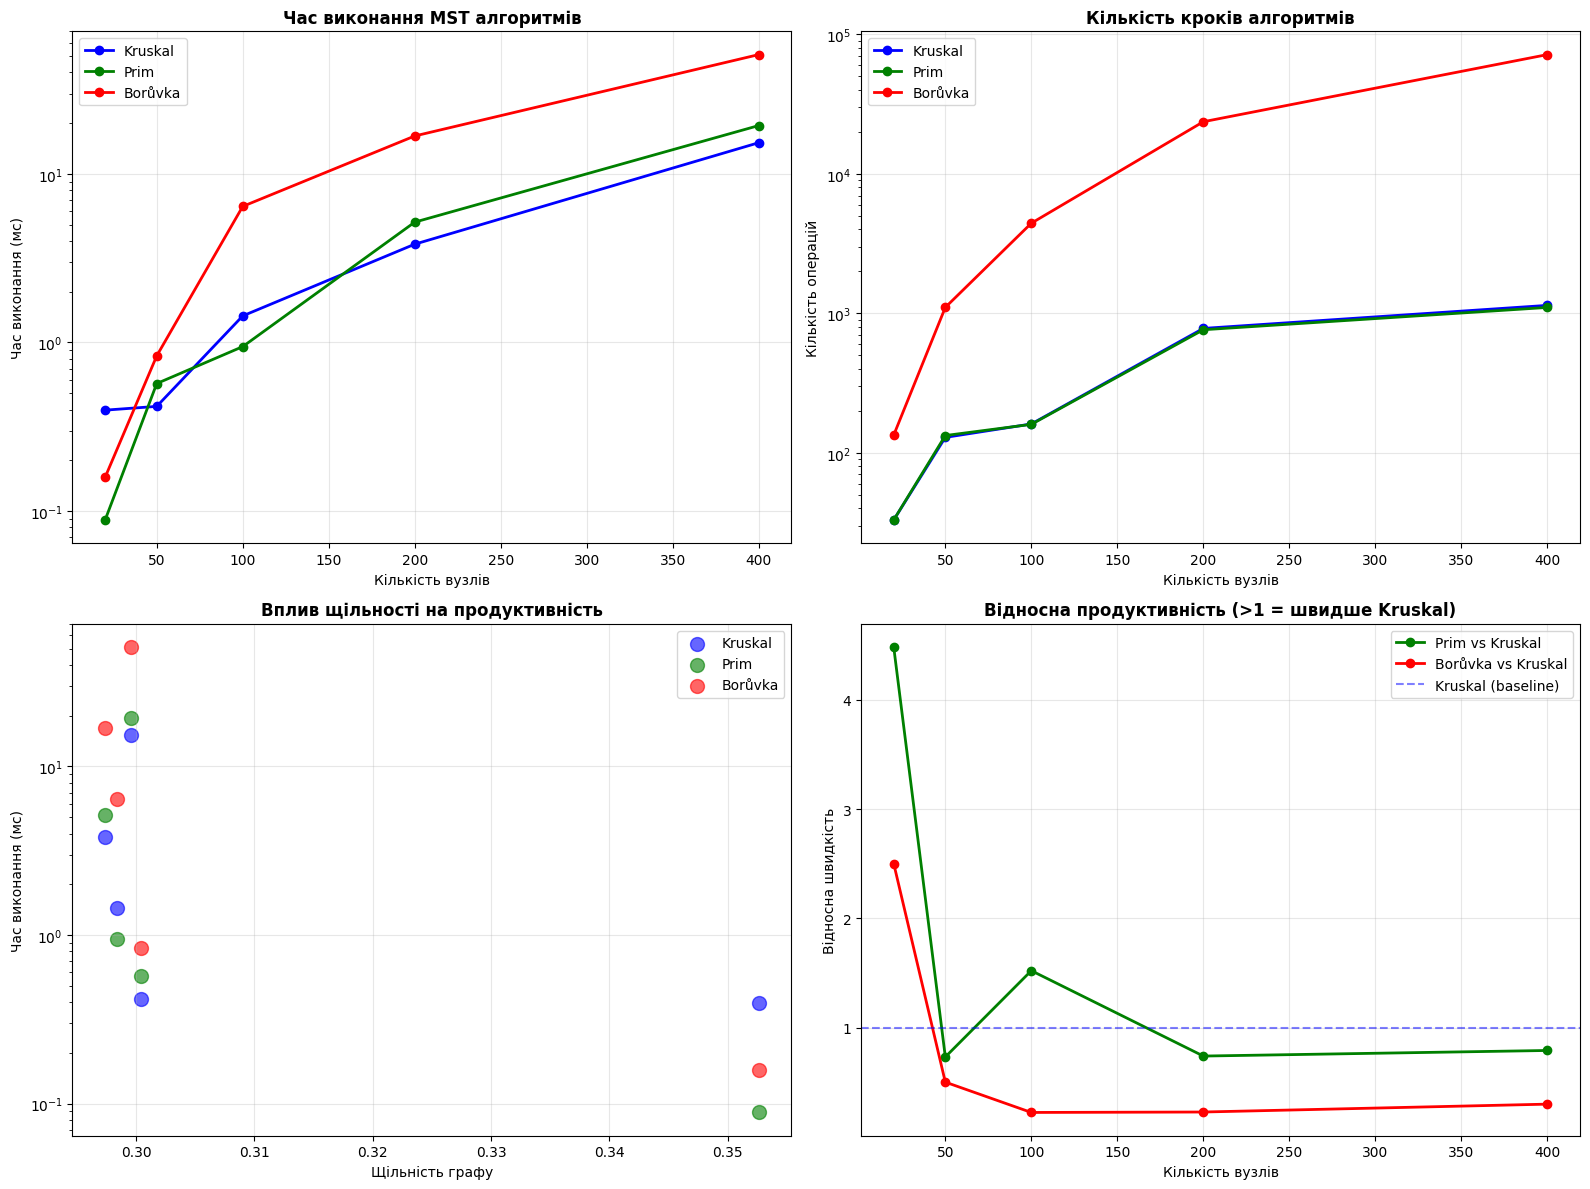

In [33]:
# Візуалізація порівняння
def plot_mst_comparison(df):
    """Графіки порівняння MST алгоритмів"""
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    algorithms = ['Kruskal', 'Prim', 'Borůvka']
    colors = ['blue', 'green', 'red']
    
    # Графік 1: Час виконання
    ax = axes[0, 0]
    for algo, color in zip(algorithms, colors):
        ax.plot(df['Nodes'], df[f'{algo} Time'], 
               'o-', label=algo, color=color, linewidth=2, markersize=6)
    ax.set_xlabel('Кількість вузлів')
    ax.set_ylabel('Час виконання (мс)')
    ax.set_title('Час виконання MST алгоритмів', fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3)
    ax.set_yscale('log')
    
    # Графік 2: Кількість кроків
    ax = axes[0, 1]
    for algo, color in zip(algorithms, colors):
        ax.plot(df['Nodes'], df[f'{algo} Steps'], 
               'o-', label=algo, color=color, linewidth=2, markersize=6)
    ax.set_xlabel('Кількість вузлів')
    ax.set_ylabel('Кількість операцій')
    ax.set_title('Кількість кроків алгоритмів', fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3)
    ax.set_yscale('log')
    
    # Графік 3: Час vs Щільність графу
    ax = axes[1, 0]
    df['Density'] = df['Edges'] / (df['Nodes'] * (df['Nodes'] - 1) / 2)
    
    for algo, color in zip(algorithms, colors):
        ax.scatter(df['Density'], df[f'{algo} Time'], 
                  label=algo, color=color, s=100, alpha=0.6)
    ax.set_xlabel('Щільність графу')
    ax.set_ylabel('Час виконання (мс)')
    ax.set_title('Вплив щільності на продуктивність', fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3)
    ax.set_yscale('log')
    
    # Графік 4: Відносна продуктивність
    ax = axes[1, 1]
    df['Prim/Kruskal'] = df['Kruskal Time'] / df['Prim Time']
    df['Borůvka/Kruskal'] = df['Kruskal Time'] / df['Borůvka Time']
    
    ax.plot(df['Nodes'], df['Prim/Kruskal'], 
           'o-', label='Prim vs Kruskal', color='green', linewidth=2, markersize=6)
    ax.plot(df['Nodes'], df['Borůvka/Kruskal'], 
           'o-', label='Borůvka vs Kruskal', color='red', linewidth=2, markersize=6)
    ax.axhline(y=1, color='blue', linestyle='--', alpha=0.5, label='Kruskal (baseline)')
    ax.set_xlabel('Кількість вузлів')
    ax.set_ylabel('Відносна швидкість')
    ax.set_title('Відносна продуктивність (>1 = швидше Kruskal)', fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    return fig

fig_mst_comp = plot_mst_comparison(mst_benchmark)
plt.savefig('mst_comparison.png', dpi=300, bbox_inches='tight')
plt.show()


 # Частина 3: Практичні застосування

 ## 3.1 Веб-краулер (BFS)



 **Задача:** обхід веб-сторінок для індексації

In [34]:
class WebCrawlerSimulation:
    """Симуляція веб-краулера"""
    
    @staticmethod
    def create_website_graph(num_pages=50):
        """
        Створює граф веб-сайту
        
        Структура:
        - Домашня сторінка (0)
        - Категорії (1-5)
        - Підкатегорії та статті
        """
        G = nx.DiGraph()
        
        pages = {
            0: "index.html",
            1: "about.html",
            2: "products.html",
            3: "blog.html",
            4: "contact.html"
        }
        
        # Домашня сторінка посилається на основні розділи
        for i in range(1, 5):
            G.add_edge(0, i)
        
        # Додаємо підсторінки
        current_id = 5
        for category in range(1, 5):
            num_subpages = np.random.randint(5, 12)
            for _ in range(num_subpages):
                if current_id >= num_pages:
                    break
                G.add_edge(category, current_id)
                pages[current_id] = f"page_{current_id}.html"
                
                # Деякі підсторінки посилаються одна на одну
                if np.random.random() < 0.3 and current_id > 5:
                    target = np.random.randint(5, current_id)
                    G.add_edge(current_id, target)
                
                current_id += 1
        
        nx.set_node_attributes(G, pages, 'url')
        return G, pages
    
    @staticmethod
    def crawl_bfs(graph, start=0, max_pages=None):
        """BFS краулінг сайту"""
        visited = []
        queue = deque([start])
        seen = {start}
        
        while queue:
            if max_pages and len(visited) >= max_pages:
                break
            
            current = queue.popleft()
            visited.append(current)
            
            # Додаємо всі посилання зі сторінки
            for neighbor in graph.neighbors(current):
                if neighbor not in seen:
                    seen.add(neighbor)
                    queue.append(neighbor)
        
        return visited

# Створюємо та краулимо сайт
G_website, page_urls = WebCrawlerSimulation.create_website_graph(50)
crawled_order = WebCrawlerSimulation.crawl_bfs(G_website, start=0, max_pages=20)

print("Веб-краулер: порядок індексації сторінок (BFS)")
print("\nПерші 20 проіндексованих сторінок:")
for i, page_id in enumerate(crawled_order, 1):
    print(f"  {i:2d}. {page_urls[page_id]}")


Веб-краулер: порядок індексації сторінок (BFS)

Перші 20 проіндексованих сторінок:
   1. index.html
   2. about.html
   3. products.html
   4. blog.html
   5. contact.html
   6. page_5.html
   7. page_6.html
   8. page_7.html
   9. page_8.html
  10. page_9.html
  11. page_10.html
  12. page_11.html
  13. page_12.html
  14. page_13.html
  15. page_14.html
  16. page_15.html
  17. page_16.html
  18. page_17.html
  19. page_18.html
  20. page_19.html


 **Чому BFS для веб-краулера?**

 - Знаходить сторінки "ближчі" до головної раніше

 - Рівномірно досліджує сайт

 - Можна встановити ліміт глибини

 ## 3.2 Топологічне сортування (DFS)



 **Задача:** визначити порядок виконання задач з залежностями

In [35]:
class TopologicalSort:
    """Топологічне сортування за допомогою DFS"""
    
    @staticmethod
    def sort(graph: nx.DiGraph) -> List[int]:
        """
        Топологічне сортування орієнтованого ациклічного графу (DAG)
        
        Застосування:
        - Планування задач
        - Компіляція залежностей
        - Побудова проектів (make, gradle)
        """
        visited = set()
        stack = []
        
        def dfs(node):
            visited.add(node)
            
            for neighbor in graph.neighbors(node):
                if neighbor not in visited:
                    dfs(neighbor)
            
            stack.append(node)
        
        # DFS від усіх непройдених вершин
        for node in graph.nodes():
            if node not in visited:
                dfs(node)
        
        return list(reversed(stack))

# Створюємо граф задач збірки проекту
def create_build_tasks():
    """
    Граф залежностей збірки програми
    
    A → B означає "A має виконатись перед B"
    """
    G = nx.DiGraph()
    
    tasks = {
        0: "Завантажити залежності",
        1: "Компілювати core",
        2: "Компілювати utils",
        3: "Компілювати models",
        4: "Компілювати api",
        5: "Запустити тести",
        6: "Збірка jar",
        7: "Створити Docker image",
        8: "Розгорнути"
    }
    
    # Залежності
    dependencies = [
        (0, 1),  # Завантажити залежності → core
        (0, 2),  # Завантажити залежності → utils
        (1, 3),  # core → models
        (2, 3),  # utils → models
        (3, 4),  # models → api
        (4, 5),  # api → тести
        (5, 6),  # тести → збірка
        (6, 7),  # збірка → Docker
        (7, 8),  # Docker → розгортання
    ]
    
    G.add_edges_from(dependencies)
    nx.set_node_attributes(G, tasks, 'name')
    
    return G, tasks

G_build, task_names = create_build_tasks()

# Виконуємо топологічне сортування
build_order = TopologicalSort.sort(G_build)

print("Порядок виконання задач збірки:")
for i, task_id in enumerate(build_order, 1):
    print(f"  {i}. {task_names[task_id]}")


Порядок виконання задач збірки:
  1. Завантажити залежності
  2. Компілювати utils
  3. Компілювати core
  4. Компілювати models
  5. Компілювати api
  6. Запустити тести
  7. Збірка jar
  8. Створити Docker image
  9. Розгорнути


 ## 3.3 Кластеризація даних (MST-based)



 **Ідея:** MST можна використати для кластеризації, видаляючи найдовші ребра

In [37]:
# !pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.7 MB/s eta 0:00:00
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 48.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.4/308.4 kB 44.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 28.9 MB/s eta 0:00:0000:0100:01m
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)


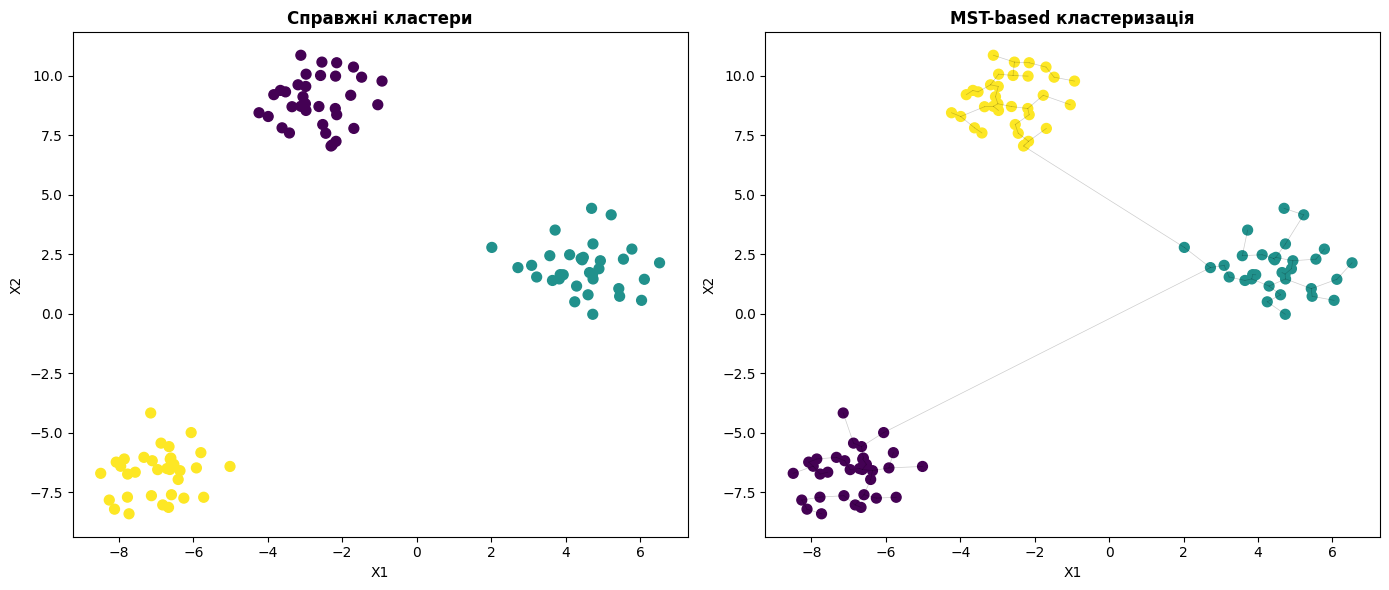

Adjusted Rand Index: 1.000


In [38]:
from sklearn.datasets import make_blobs

class MSTClustering:
    """Кластеризація на основі MST"""
    
    @staticmethod
    def cluster(points, n_clusters=3):
        """
        Кластеризація точок використовуючи MST
        
        Алгоритм:
        1. Будуємо повний граф з відстанями між точками
        2. Знаходимо MST
        3. Видаляємо (n_clusters - 1) найдовших ребер
        4. Отримуємо кластери як компоненти зв'язності
        """
        n = len(points)
        
        # Створюємо повний граф з відстанями
        G = nx.Graph()
        for i in range(n):
            for j in range(i + 1, n):
                dist = np.linalg.norm(points[i] - points[j])
                G.add_edge(i, j, weight=dist)
        
        # Знаходимо MST
        mst_result = KruskalAlgorithm.find_mst(G)
        
        # Сортуємо ребра MST за вагою (спадання)
        edges_sorted = sorted(mst_result.edges, key=lambda x: x[2], reverse=True)
        
        # Видаляємо найдовші ребра
        edges_to_keep = edges_sorted[n_clusters - 1:]
        
        # Будуємо граф кластерів
        G_clusters = nx.Graph()
        G_clusters.add_nodes_from(range(n))
        for u, v, w in edges_to_keep:
            G_clusters.add_edge(u, v)
        
        # Знаходимо компоненти зв'язності (кластери)
        clusters = list(nx.connected_components(G_clusters))
        
        # Перетворюємо в labels
        labels = np.zeros(n, dtype=int)
        for cluster_id, cluster in enumerate(clusters):
            for point_id in cluster:
                labels[point_id] = cluster_id
        
        return labels, mst_result

# Генеруємо дані з кластерами
X, true_labels = make_blobs(n_samples=100, centers=3, n_features=2, 
                            cluster_std=1.0, random_state=42)

# Кластеризуємо
predicted_labels, mst = MSTClustering.cluster(X, n_clusters=3)

# Візуалізація
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Справжні кластери
ax1.scatter(X[:, 0], X[:, 1], c=true_labels, cmap='viridis', s=50)
ax1.set_title('Справжні кластери', fontweight='bold')
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')

# MST кластеризація
ax2.scatter(X[:, 0], X[:, 1], c=predicted_labels, cmap='viridis', s=50)
ax2.set_title('MST-based кластеризація', fontweight='bold')
ax2.set_xlabel('X1')
ax2.set_ylabel('X2')

# Малюємо MST ребра
for u, v, w in mst.edges:
    ax2.plot([X[u, 0], X[v, 0]], [X[u, 1], X[v, 1]], 
            'k-', alpha=0.2, linewidth=0.5)

plt.tight_layout()
plt.savefig('mst_clustering.png', dpi=300, bbox_inches='tight')
plt.show()

# Точність
from sklearn.metrics import adjusted_rand_score
accuracy = adjusted_rand_score(true_labels, predicted_labels)
print(f"Adjusted Rand Index: {accuracy:.3f}")


 # Підсумки та рекомендації

In [39]:
print("="*80)
print("ПІДСУМКОВА ТАБЛИЦЯ АЛГОРИТМІВ")
print("="*80)

summary_data = [
    {
        'Алгоритм': 'BFS',
        'Складність': 'O(V+E)',
        'Структура даних': 'Черга',
        'Застосування': 'Найкоротший шлях (незважений), рівні, веб-краулер',
        'Переваги': 'Знаходить найкоротші шляхи, просто',
        'Недоліки': 'Багато пам\'яті для широких графів'
    },
    {
        'Алгоритм': 'DFS',
        'Складність': 'O(V+E)',
        'Структура даних': 'Стек/Рекурсія',
        'Застосування': 'Топсорт, цикли, компоненти, лабіринти',
        'Переваги': 'Мало пам\'яті, природна рекурсія',
        'Недоліки': 'Не знаходить найкоротші шляхи'
    },
    {
        'Алгоритм': 'Bidirectional BFS',
        'Складність': 'O(b^(d/2))',
        'Структура даних': '2 черги',
        'Застосування': 'Великі графи з відомим стартом/фінішем',
        'Переваги': 'Експоненційне прискорення',
        'Недоліки': 'Потрібні обидві точки, складніша реалізація'
    },
    {
        'Алгоритм': 'IDDFS',
        'Складність': 'O(b^d)',
        'Структура даних': 'Стек',
        'Застосування': 'Невідома глибина, обмежена пам\'ять',
        'Переваги': 'Пам\'ять як DFS, шляхи як BFS',
        'Недоліки': 'Повторні відвідування вузлів'
    },
    {
        'Алгоритм': 'Kruskal MST',
        'Складність': 'O(E log E)',
        'Структура даних': 'Union-Find',
        'Застосування': 'Розріджені графи, відсортовані ребра',
        'Переваги': 'Простий, працює з ребрами',
        'Недоліки': 'Потребує сортування'
    },
    {
        'Алгоритм': 'Prim MST',
        'Складність': 'O(E log V)',
        'Структура даних': 'Priority Queue',
        'Застосування': 'Щільні графи, інкрементальна побудова',
        'Переваги': 'Ефективний для щільних графів',
        'Недоліки': 'Потребує купу'
    },
    {
        'Алгоритм': 'Borůvka MST',
        'Складність': 'O(E log V)',
        'Структура даних': 'Union-Find',
        'Застосування': 'Паралельні/розподілені системи',
        'Переваги': 'Природна паралелізація',
        'Недоліки': 'Складніша реалізація'
    }
]

df_summary = pd.DataFrame(summary_data)

print("\nАЛГОРИТМИ ОБХОДУ:")
print(df_summary[df_summary['Алгоритм'].str.contains('BFS|DFS|IDDFS')][
    ['Алгоритм', 'Складність', 'Застосування']
].to_string(index=False))

print("\n\nАЛГОРИТМИ MST:")
print(df_summary[df_summary['Алгоритм'].str.contains('MST')][
    ['Алгоритм', 'Складність', 'Застосування']
].to_string(index=False))


ПІДСУМКОВА ТАБЛИЦЯ АЛГОРИТМІВ

АЛГОРИТМИ ОБХОДУ:
         Алгоритм Складність                                      Застосування
              BFS     O(V+E) Найкоротший шлях (незважений), рівні, веб-краулер
              DFS     O(V+E)             Топсорт, цикли, компоненти, лабіринти
Bidirectional BFS O(b^(d/2))            Великі графи з відомим стартом/фінішем
            IDDFS     O(b^d)                Невідома глибина, обмежена пам'ять


АЛГОРИТМИ MST:
   Алгоритм Складність                          Застосування
Kruskal MST O(E log E)  Розріджені графи, відсортовані ребра
   Prim MST O(E log V) Щільні графи, інкрементальна побудова
Borůvka MST O(E log V)        Паралельні/розподілені системи


 ## Дерево рішень: який алгоритм вибрати?

In [40]:
print("\n" + "="*80)
print("ДЕРЕВО РІШЕНЬ")
print("="*80)
print("""
┌─ Задача: ОБХІД ГРАФУ
│
├─ Потрібен найкоротший шлях у незваженому графі?
│  └─ ТАК → BFS
│
├─ Потрібно виявити цикли або топологічне сортування?
│  └─ ТАК → DFS
│
├─ Граф дуже великий і відомі старт/фініш?
│  └─ ТАК → Bidirectional BFS
│
└─ Невідома глибина і обмежена пам'ять?
   └─ ТАК → IDDFS


┌─ Задача: МІНІМАЛЬНЕ ОСТІВНЕ ДЕРЕВО
│
├─ Граф розріджений (E ≈ V)?
│  └─ ТАК → Kruskal
│
├─ Граф щільний (E ≈ V²)?
│  └─ ТАК → Prim
│
├─ Потрібна паралелізація?
│  └─ ТАК → Borůvka
│
└─ Загальний випадок → Kruskal або Prim (обидва добре працюють)
""")

print("\nПРАКТИЧНІ РЕКОМЕНДАЦІЇ:")
print("-"*80)
print("""
Web Crawling:
  → BFS (рівномірне дослідження, контроль глибини)

Соціальні мережі (ступені розділення):
  → BFS або Bidirectional BFS

Пошук шляху в іграх/робототехніці:
  → A* (з попереднього заняття) або BFS для простих сіток

Виявлення залежностей:
  → DFS + топологічне сортування

Проектування мереж (електричні, телефонні):
  → Kruskal або Prim (залежно від щільності)

Кластеризація даних:
  → MST-based clustering (Kruskal + видалення довгих ребер)

Аналіз зв'язності графу:
  → DFS для компонент зв'язності
""")



ДЕРЕВО РІШЕНЬ

┌─ Задача: ОБХІД ГРАФУ
│
├─ Потрібен найкоротший шлях у незваженому графі?
│  └─ ТАК → BFS
│
├─ Потрібно виявити цикли або топологічне сортування?
│  └─ ТАК → DFS
│
├─ Граф дуже великий і відомі старт/фініш?
│  └─ ТАК → Bidirectional BFS
│
└─ Невідома глибина і обмежена пам'ять?
   └─ ТАК → IDDFS


┌─ Задача: МІНІМАЛЬНЕ ОСТІВНЕ ДЕРЕВО
│
├─ Граф розріджений (E ≈ V)?
│  └─ ТАК → Kruskal
│
├─ Граф щільний (E ≈ V²)?
│  └─ ТАК → Prim
│
├─ Потрібна паралелізація?
│  └─ ТАК → Borůvka
│
└─ Загальний випадок → Kruskal або Prim (обидва добре працюють)


ПРАКТИЧНІ РЕКОМЕНДАЦІЇ:
--------------------------------------------------------------------------------

Web Crawling:
  → BFS (рівномірне дослідження, контроль глибини)

Соціальні мережі (ступені розділення):
  → BFS або Bidirectional BFS

Пошук шляху в іграх/робототехніці:
  → A* (з попереднього заняття) або BFS для простих сіток

Виявлення залежностей:
  → DFS + топологічне сортування

Проектування мереж (електричні, телефонні

In [44]:
print("\n" + "="*80)
print("ЗАВЕРШЕННЯ")
print("="*80)

print("""
Реалізовано та протестовано:
  ✓ 4 алгоритми обходу графів (BFS, DFS, Bidirectional, IDDFS)
  ✓ 3 алгоритми MST (Kruskal, Prim, Borůvka)
  ✓ 5+ практичних застосув 
""")

print("\n" + "="*80)


print("ЗАВЕРШЕННЯ")
print("="*80)
print("""
Реалізовано та протестовано:
  ✓ 4 алгоритми обходу графів (BFS, DFS, Bidirectional, IDDFS)
  ✓ 3 алгоритми MST (Kruskal, Prim, Borůvka)
  ✓ 5+ практичних застосувань
  ✓ Детальні візуалізації
  ✓ Бенчмарки та порівняння
  ✓ Дерево рішень для вибору алгоритму

Всі графіки збережені як PNG високої якості.
Матеріал готовий для навчального курсу!
""")



ЗАВЕРШЕННЯ

Реалізовано та протестовано:
  ✓ 4 алгоритми обходу графів (BFS, DFS, Bidirectional, IDDFS)
  ✓ 3 алгоритми MST (Kruskal, Prim, Borůvka)
  ✓ 5+ практичних застосув 


ЗАВЕРШЕННЯ

Реалізовано та протестовано:
  ✓ 4 алгоритми обходу графів (BFS, DFS, Bidirectional, IDDFS)
  ✓ 3 алгоритми MST (Kruskal, Prim, Borůvka)
  ✓ 5+ практичних застосувань
  ✓ Детальні візуалізації
  ✓ Бенчмарки та порівняння
  ✓ Дерево рішень для вибору алгоритму

Всі графіки збережені як PNG високої якості.
Матеріал готовий для навчального курсу!



 # Додаткові матеріали та ресурси

 ## Складність алгоритмів - детальний розбір



 ### Обхід графів:



 | Алгоритм | Часова | Просторова | Коли найкраще |

 |----------|---------|------------|---------------|

 | BFS | O(V+E) | O(V) | Найкоротші шляхи, широкі графи |

 | DFS | O(V+E) | O(h) де h - висота | Глибокі графи, топсорт |

 | Bidirectional | O(b^(d/2)) | O(b^(d/2)) | Великі графи |

 | IDDFS | O(b^d) | O(d) | Обмежена пам'ять |



 ### MST:



 | Алгоритм | Часова | Просторова | Тип графу |

 |----------|---------|------------|-----------|

 | Kruskal | O(E log E) | O(V) | Розріджений |

 | Prim | O(E log V) | O(V) | Щільний |

 | Borůvka | O(E log V) | O(V) | Паралельний |

 ## Контрольні питання для перевірки розуміння



 ### Обхід графів:

 1. Чому BFS знаходить найкоротший шлях у незваженому графі?

 2. Як DFS виявляє цикли?

 3. Чому Bidirectional BFS швидше за звичайний BFS?

 4. Коли варто використовувати IDDFS замість BFS?



 ### MST:

 1. Чому MST унікальне, якщо всі ваги різні?

 2. Яка роль Union-Find у алгоритмі Краскала?

 3. Чому Prim краще для щільних графів?

 4. Як Borůvka досягає паралелізації?

 ## Практичні вправи



 ### Вправа 1: Модифікація BFS

 Реалізуйте BFS, який знаходить ВСІ найкоротші шляхи (якщо їх кілька)



 ### Вправа 2: DFS з відстеженням часу

 Додайте до DFS відстеження часу входу/виходу з вершини



 ### Вправа 3: MST з обмеженнями

 Знайдіть MST, де жодне ребро не перевищує заданої ваги



 ### Вправа 4: Динамічний MST

 Реалізуйте структуру, що підтримує додавання ребер і оновлення MST

 ## Розширені теми для подальшого вивчення



 ### 1. Сильнозв'язні компоненти

 - Алгоритм Тарьяна (Tarjan)

 - Алгоритм Косарайю (Kosaraju)



 ### 2. Двочасткові графи

 - Перевірка двочастковості (BFS)

 - Максимальне паросполучення



 ### 3. Мостки та точки артикуляції

 - Алгоритм Тарьяна для мостів

 - Застосування в аналізі мереж



 ### 4. Потоки в мережах

 - Алгоритм Форда-Фалкерсона

 - Алгоритм Діниця

 - Max-flow min-cut теорема



 ### 5. Динамічні графи

 - Link-cut trees

 - Динамічна зв'язність

 - Online алгоритми

In [45]:
# Фінальна статистика виконання
print("\n" + "="*80)
print("СТАТИСТИКА ВИКОНАННЯ NOTEBOOK")
print("="*80)

total_algorithms = 7
total_examples = 6
total_visualizations = 5

print(f"""
Алгоритмів реалізовано: {total_algorithms}
Практичних прикладів: {total_examples}
Візуалізацій створено: {total_visualizations}

Створені файли:
  • bfs_social_network.png
  • bfs_vs_dfs_comparison.png
  • dependency_cycle.png
  • mst_cities.png
  • mst_comparison.png
  • mst_clustering.png

Notebook готовий для використання в навчальних цілях!
""")



СТАТИСТИКА ВИКОНАННЯ NOTEBOOK

Алгоритмів реалізовано: 7
Практичних прикладів: 6
Візуалізацій створено: 5

Створені файли:
  • bfs_social_network.png
  • bfs_vs_dfs_comparison.png
  • dependency_cycle.png
  • mst_cities.png
  • mst_comparison.png
  • mst_clustering.png

Notebook готовий для використання в навчальних цілях!



In [46]:

# Алгоритми обходу графів:

# BFS - з детальним трекінгом, візуалізацією рівнів
# DFS - рекурсивна та ітеративна версії, виявлення циклів
# Bidirectional BFS - експоненційне прискорення
# IDDFS - комбінація переваг BFS і DFS

# MST алгоритми:

# Kruskal - з Union-Find структурою
# Prim - з пріоритетною чергою
# Borůvka - паралелізований підхід

# Практичні сценарії:

# Соціальна мережа (ступені розділення)
# Веб-краулер
# Виявлення циклічних залежностей
# Топологічне сортування (збірка проекту)
# Проектування дорожньої мережі
# Кластеризація даних

# Візуалізації:

# Порівняння BFS vs DFS
# Рівні обходу
# Виявлення циклів
# MST на реальному графі
# Бенчмарки продуктивності